In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Real_Estate Data (1).csv')

In [3]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,1786.0
...,...,...,...,...,...,...
263231,406420.0,5.0,3.0,Trinity,North Carolina,1786.0
263232,116500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263233,112500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263234,147500.0,3.0,2.0,Greensboro,North Carolina,1786.0


In [4]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,1786.0
...,...,...,...,...,...,...
263231,406420.0,5.0,3.0,Trinity,North Carolina,1786.0
263232,116500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263233,112500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263234,147500.0,3.0,2.0,Greensboro,North Carolina,1786.0


ANOVA Hypothesis Test

H0: Mean price is same across all cities
Ha: Mean price is not same across all the cities


In [5]:
city_groups = [group for group in df.groupby('city')]

In [6]:
city_groups

[('349900.0',
            price       bed      bath      city     state  house_size
  43971  349900.0  349900.0  349900.0  349900.0  349900.0    349900.0),
 ('Aaronsburg',
             price  bed  bath        city         state  house_size
  165526  139999.0  4.0   2.0  Aaronsburg  Pennsylvania      2128.0
  165527  365000.0  2.0   2.0  Aaronsburg  Pennsylvania      1560.0),
 ('Abbot',
            price  bed  bath   city  state  house_size
  27425  149000.0  3.0   2.0  Abbot  Maine      1792.0
  27427  425000.0  4.0   2.0  Abbot  Maine      1600.0
  27428   21900.0  3.0   2.0  Abbot  Maine      1786.0
  27429   39900.0  3.0   2.0  Abbot  Maine      1786.0),
 ('Abbottstown',
             price  bed  bath         city         state  house_size
  167361  499900.0  2.0   2.0  Abbottstown  Pennsylvania      2628.0
  167390  349900.0  3.0   2.0  Abbottstown  Pennsylvania      1327.0
  167452  975000.0  7.0   5.0  Abbottstown  Pennsylvania      7337.0
  167554  239900.0  3.0   3.0  Abbottstow

In [7]:
from scipy.stats import f_oneway, kruskal

In [8]:
city_groups = [
    group['price'].dropna()
    for _, group in df.groupby('city')
]

In [9]:
city_groupss = [
    group['price'].dropna()
    for _, group in df.groupby('house_size')
]

In [10]:
f_stat_city, p_value_city = f_oneway(*city_groupss)

print("House_Size vs Price ANOVA p-value:", p_value_city)

House_Size vs Price ANOVA p-value: 0.0


In [11]:
f_stat_city, p_value_city = f_oneway(*city_groups)

print("City vs Price ANOVA p-value:", p_value_city)

City vs Price ANOVA p-value: 0.0


In [12]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['price'])
print("Shapiro-Wilk Test")
print("Statistic:", stat)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.034365321896674184
p-value: 1.3612838196140694e-209


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 263236.
  res = hypotest_fun_out(*samples, **kwds)


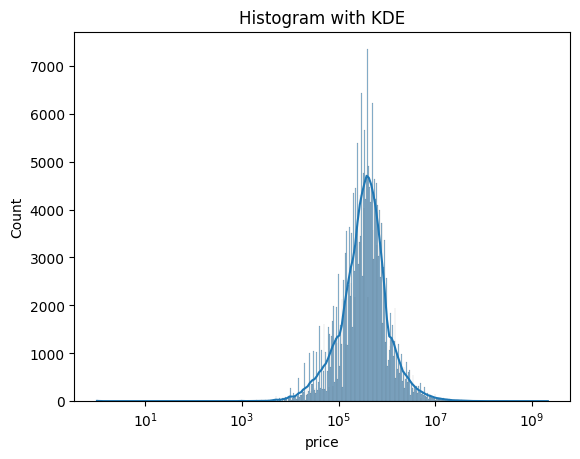

In [13]:
sns.histplot(df['price'], kde=True, log_scale= True)
plt.title("Histogram with KDE")
plt.show()

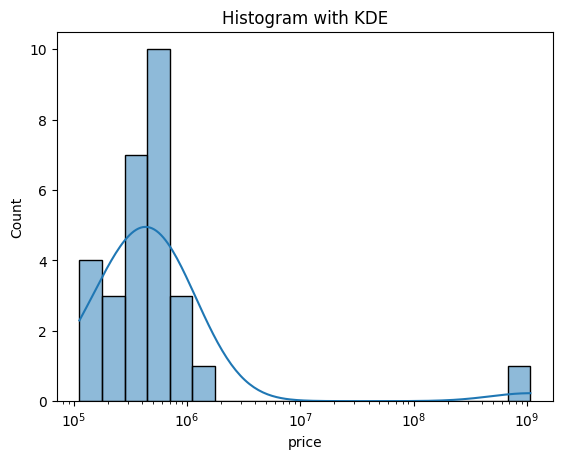

In [14]:
sns.histplot(df.groupby('state')['price'].mean(), kde=True, log_scale= True)
plt.title("Histogram with KDE")
plt.show()

In [15]:
import matplotlib.pyplot as plt

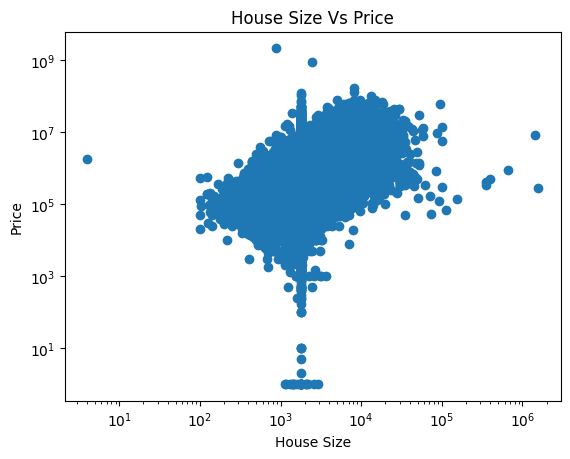

In [16]:
plt.scatter(df['house_size'], df['price'])
plt.xscale('log') # Set x-axis to logarithmic scale
plt.yscale('log') # Set y-axis to logarithmic scale
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('House Size Vs Price')
plt.show()

In [17]:
import seaborn as sns

Detecting the outliers

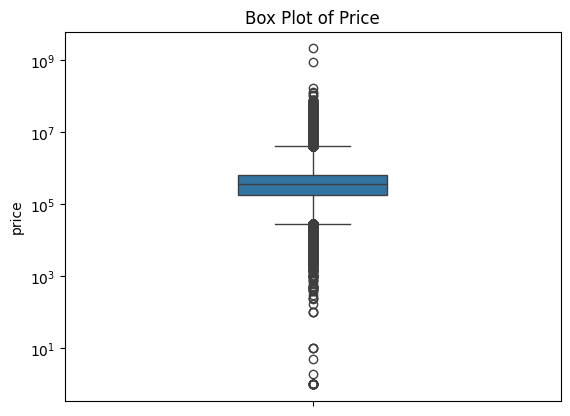

In [18]:
sns.boxplot(df['price'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of Price')
plt.show()

In [19]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < Q1 - 1.5*IQR) |
              (df['price'] > Q3 + 1.5*IQR)]

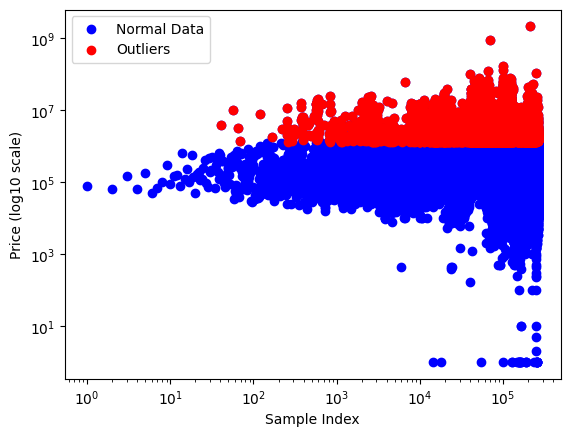

In [20]:
plt.figure()
plt.scatter(df.index, df['price'], label = 'Normal Data', color = 'blue')
plt.scatter(outliers.index, outliers['price'], label = 'Outliers', color = 'red')
plt.xlabel("Sample Index")
plt.ylabel("Price (log10 scale)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [21]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['price'] = df['price'].clip(lower, upper)

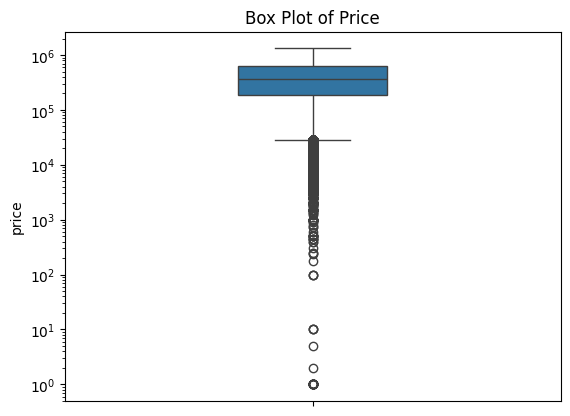

In [22]:
sns.boxplot(df['price'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of Price')
plt.show()

In [23]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,1786.0
...,...,...,...,...,...,...
263231,406420.0,5.0,3.0,Trinity,North Carolina,1786.0
263232,116500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263233,112500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263234,147500.0,3.0,2.0,Greensboro,North Carolina,1786.0


In [24]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,1800.0
4,65000.0,6.0,2.0,Mayaguez,Puerto Rico,1786.0
...,...,...,...,...,...,...
263231,406420.0,5.0,3.0,Trinity,North Carolina,1786.0
263232,116500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263233,112500.0,3.0,2.0,Greensboro,North Carolina,1786.0
263234,147500.0,3.0,2.0,Greensboro,North Carolina,1786.0


In [25]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [26]:
numbers_outliers = outliers.shape[0]
print(numbers_outliers)

0


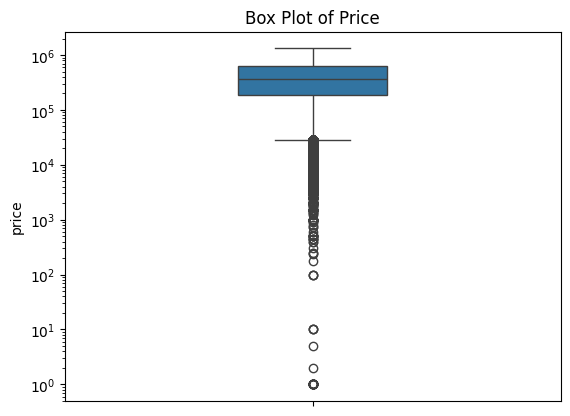

In [27]:
sns.boxplot(df['price'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of Price')
plt.show()

In [28]:
!pip install category_encoders
from category_encoders import TargetEncoder

te = TargetEncoder(cols=['city', 'state'])
df[['city', 'state']] = te.fit_transform(df[['city', 'state']], df['price'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.9 MB/s eta 0:00:00


In [29]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,416267.497569,367288.917988,920.0
1,80000.0,4.0,2.0,416267.497569,367288.917988,1527.0
2,67000.0,2.0,1.0,325519.775284,367288.917988,748.0
3,145000.0,4.0,2.0,220986.324469,367288.917988,1800.0
4,65000.0,6.0,2.0,187930.599854,367288.917988,1786.0
...,...,...,...,...,...,...
263231,406420.0,5.0,3.0,502943.793862,305934.533944,1786.0
263232,116500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263233,112500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263234,147500.0,3.0,2.0,384551.830688,305934.533944,1786.0


In [30]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train
X_test_scaled = scaler.transform(X_test)

In [33]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test_scaled)
print("R2:",r2_score(Y_test, y_pred))
print("MSE:", mean_squared_error(Y_test, y_pred))

R2: 0.45652861626983987
MSE: 78178335867.7699


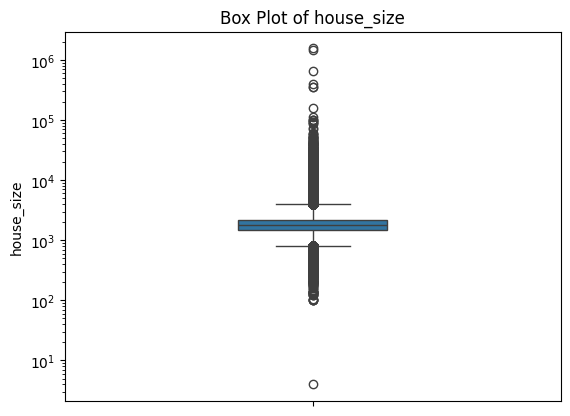

In [35]:
sns.boxplot(df['house_size'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of house_size')
plt.show()

In [36]:
Q1 = df['house_size'].quantile(0.25)
Q3 = df['house_size'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['house_size'] < Q1 - 1.5*IQR) |
              (df['house_size'] > Q3 + 1.5*IQR)]

In [37]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['house_size'] = df['house_size'].clip(lower, upper)

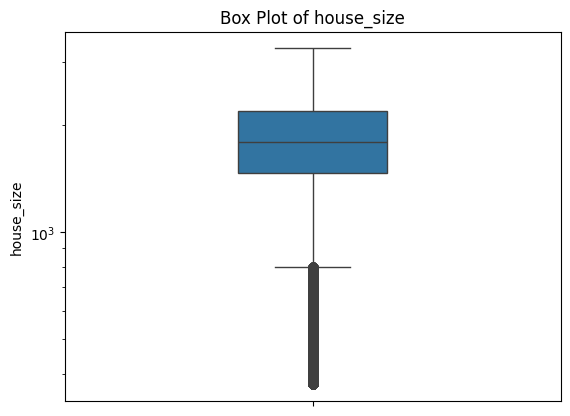

In [38]:
sns.boxplot(df['house_size'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of house_size')
plt.show()

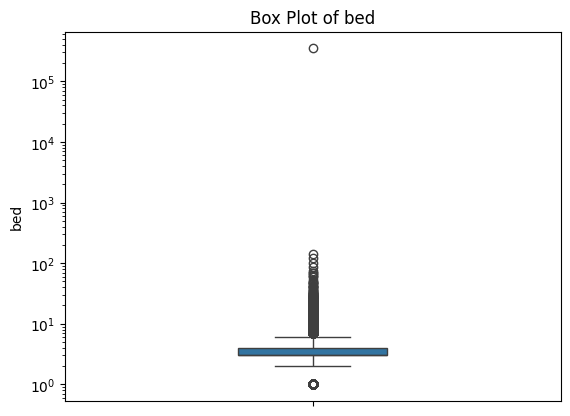

In [39]:
sns.boxplot(df['bed'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of bed')
plt.show()

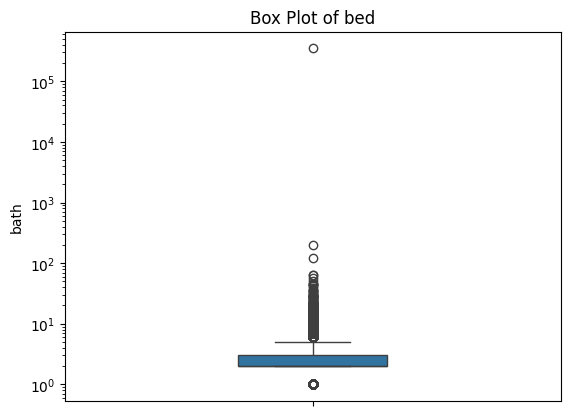

In [40]:
sns.boxplot(df['bath'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of bed')
plt.show()

In [41]:
Q1 = df['bed'].quantile(0.25)
Q3 = df['bed'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['bed'] < Q1 - 1.5*IQR) |
              (df['bed'] > Q3 + 1.5*IQR)]

In [42]:
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['bath'] < Q1 - 1.5*IQR) |
              (df['bath'] > Q3 + 1.5*IQR)]

In [43]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['bed'] = df['bed'].clip(lower, upper)

In [44]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['bath'] = df['bath'].clip(lower, upper)

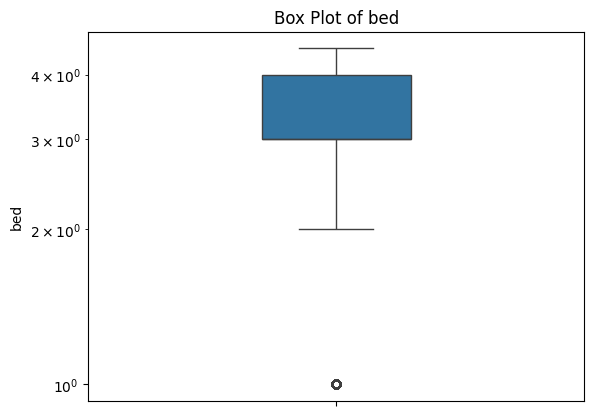

In [45]:
sns.boxplot(df['bed'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of bed')
plt.show()

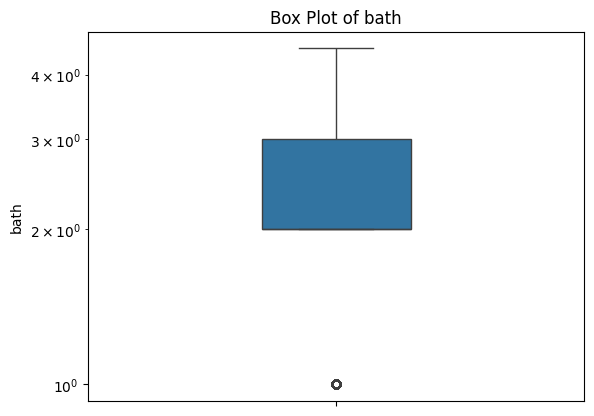

In [46]:
sns.boxplot(df['bath'], log_scale=True, width=0.3, orient='v', showfliers=True)
plt.title('Box Plot of bath')
plt.show()

In [47]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,416267.497569,367288.917988,920.0
1,80000.0,4.0,2.0,416267.497569,367288.917988,1527.0
2,67000.0,2.0,1.0,325519.775284,367288.917988,748.0
3,145000.0,4.0,2.0,220986.324469,367288.917988,1800.0
4,65000.0,4.5,2.0,187930.599854,367288.917988,1786.0
...,...,...,...,...,...,...
263231,406420.0,4.5,3.0,502943.793862,305934.533944,1786.0
263232,116500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263233,112500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263234,147500.0,3.0,2.0,384551.830688,305934.533944,1786.0


In [48]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train
X_test_scaled = scaler.transform(X_test)

In [51]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test_scaled)
print("R2:",r2_score(Y_test, y_pred))
print("MSE:", mean_squared_error(Y_test, y_pred))

R2: 0.6274849042094734
MSE: 53586280982.525444


In [53]:
df

,price,bed,bath,city,state,house_size
0,105000.0,3.0,2.0,416267.497569,367288.917988,920.0
1,80000.0,4.0,2.0,416267.497569,367288.917988,1527.0
2,67000.0,2.0,1.0,325519.775284,367288.917988,748.0
3,145000.0,4.0,2.0,220986.324469,367288.917988,1800.0
4,65000.0,4.5,2.0,187930.599854,367288.917988,1786.0
...,...,...,...,...,...,...
263231,406420.0,4.5,3.0,502943.793862,305934.533944,1786.0
263232,116500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263233,112500.0,3.0,2.0,384551.830688,305934.533944,1786.0
263234,147500.0,3.0,2.0,384551.830688,305934.533944,1786.0


In [54]:
df['price_per_sqft'] = df['price'] / df['house_size']

In [55]:
df['sqft_per_bed'] = df['house_size'] / df['bed']

In [56]:
state_mean_price = df.groupby('state')['price'].mean()
df['state_avg_price'] = df['state'].map(state_mean_price)

In [57]:
city_mean_price = df.groupby('city')['price'].mean()
df['city_avg_price'] = df['city'].map(city_mean_price)

In [58]:
df

,price,bed,bath,city,state,house_size,price_per_sqft,sqft_per_bed,state_avg_price,city_avg_price
0,105000.0,3.0,2.0,416267.497569,367288.917988,920.0,114.130435,306.666667,367288.917988,92500.000000
1,80000.0,4.0,2.0,416267.497569,367288.917988,1527.0,52.390308,381.750000,367288.917988,92500.000000
2,67000.0,2.0,1.0,325519.775284,367288.917988,748.0,89.572193,374.000000,367288.917988,110300.000000
3,145000.0,4.0,2.0,220986.324469,367288.917988,1800.0,80.555556,450.000000,367288.917988,219613.805556
4,65000.0,4.5,2.0,187930.599854,367288.917988,1786.0,36.394177,396.888889,367288.917988,178524.166667
...,...,...,...,...,...,...,...,...,...,...
263231,406420.0,4.5,3.0,502943.793862,305934.533944,1786.0,227.558791,396.888889,305934.533944,684448.333333
263232,116500.0,3.0,2.0,384551.830688,305934.533944,1786.0,65.229563,595.333333,305934.533944,384551.830688
263233,112500.0,3.0,2.0,384551.830688,305934.533944,1786.0,62.989922,595.333333,305934.533944,384551.830688
263234,147500.0,3.0,2.0,384551.830688,305934.533944,1786.0,82.586786,595.333333,305934.533944,384551.830688


In [59]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train
X_test_scaled = scaler.transform(X_test)

In [62]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [63]:
y_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)
print("R2 (Test):",r2_score(Y_test, y_pred))
print("R2 (Train):",r2_score(Y_train, y_train_pred))
print("MSE (Test):", mean_squared_error(Y_test, y_pred))

R2 (Test): 0.8752220070487288
R2 (Train): 0.8762348387939911
MSE (Test): 17949309078.422688


In [74]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
rmse_percent = (rmse / np.mean(Y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE Percentage: {rmse_percent:.2f}%")


RMSE: 133975.03
RMSE Percentage: 28.58%


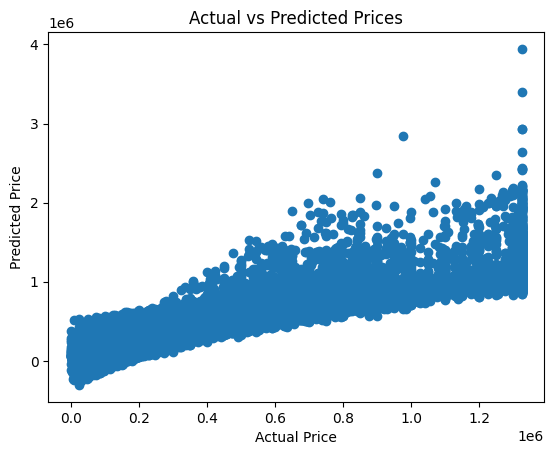

In [64]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

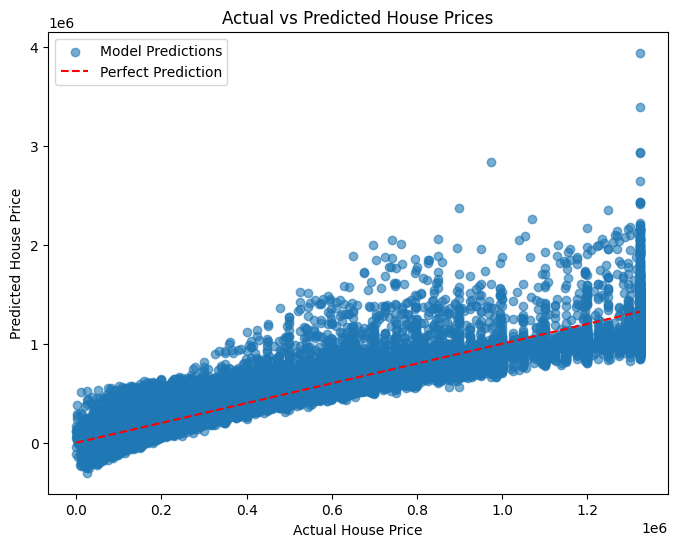

In [65]:
plt.figure(figsize=(8, 6))

plt.scatter(
    Y_test,
    y_pred,
    alpha=0.6,
    label="Model Predictions"
)

# Perfect prediction line
plt.plot(
    [Y_test.min(), Y_test.max()],
    [Y_test.min(), Y_test.max()],
    linestyle="--",
    label="Perfect Prediction",
    color = 'red'
)

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

In [66]:
df

,price,bed,bath,city,state,house_size,price_per_sqft,sqft_per_bed,state_avg_price,city_avg_price
0,105000.0,3.0,2.0,416267.497569,367288.917988,920.0,114.130435,306.666667,367288.917988,92500.000000
1,80000.0,4.0,2.0,416267.497569,367288.917988,1527.0,52.390308,381.750000,367288.917988,92500.000000
2,67000.0,2.0,1.0,325519.775284,367288.917988,748.0,89.572193,374.000000,367288.917988,110300.000000
3,145000.0,4.0,2.0,220986.324469,367288.917988,1800.0,80.555556,450.000000,367288.917988,219613.805556
4,65000.0,4.5,2.0,187930.599854,367288.917988,1786.0,36.394177,396.888889,367288.917988,178524.166667
...,...,...,...,...,...,...,...,...,...,...
263231,406420.0,4.5,3.0,502943.793862,305934.533944,1786.0,227.558791,396.888889,305934.533944,684448.333333
263232,116500.0,3.0,2.0,384551.830688,305934.533944,1786.0,65.229563,595.333333,305934.533944,384551.830688
263233,112500.0,3.0,2.0,384551.830688,305934.533944,1786.0,62.989922,595.333333,305934.533944,384551.830688
263234,147500.0,3.0,2.0,384551.830688,305934.533944,1786.0,82.586786,595.333333,305934.533944,384551.830688


In [67]:
coefficients = lr.coef_

In [68]:
coefficients

array([ 29134.0356906 ,  49670.39775235, -17133.57523529,  23554.64716277,
       132306.99540094, 269635.47158269,  14657.68559533, -19071.14613015,
        69780.44126808])

In [69]:
X = df[['bed', 'bath', 'city', 'state', 'house_size', 'price_per_sqft', 'sqft_per_bed', 'state_avg_price','city_avg_price']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X_scaled.columns
vif_data['VIF'] = [
    variance_inflation_factor(X_scaled.values, i)
    for i in range(X_scaled.shape[1])
]


In [71]:
vif_data

,feature,VIF
0,bed,6.764063
1,bath,2.294452
2,city,14.650556
3,state,2266.599074
4,house_size,8.486718
5,price_per_sqft,2.174335
6,sqft_per_bed,5.110895
7,state_avg_price,2266.809058
8,city_avg_price,15.145344
